# **Student grade prediction**

<img src="https://thumbs.dreamstime.com/z/success-student-grade-10989341.jpg" style="width:350px;height:300px;">
<caption><center> <u> <font color='purple'>  <br> </u> <font color='purple'>
    
 This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("./student-mat.csv")

In [3]:
#Data shape
shape = data.shape
print("We have {} students and {} variables.".format(shape[0], shape[1]))
#Columns
columns = data.columns
print("The list of columns: {}".format(columns))

We have 395 students and 33 variables.
The list of columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [4]:
#Data overview
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#Missing values
print("Missing values per variable")
data.isna().sum().sort_values(ascending = False)

Missing values per variable


school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64

There are no missing values in the dataset

In [6]:
#Data description
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### **Stats about the grade**

Text(0.5, 1.0, 'Final Grades distribution')

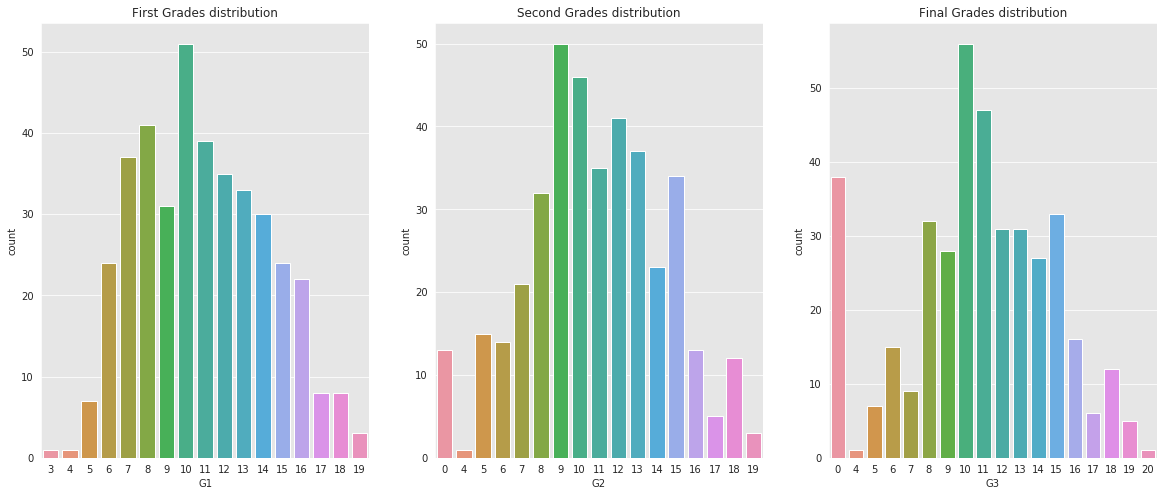

In [7]:
# Statistics and distribution about grades

#Styling
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#First Grade count
ax_1 = plt.subplot(1, 3, 1)
s = sns.countplot(x="G1", data=data, ax=ax_1)
s.set_title("First Grades distribution")

#Second Grade count
ax_2 = plt.subplot(1, 3, 2)
s = sns.countplot(x="G2", data=data, ax=ax_2)
s.set_title("Second Grades distribution")

#Final Grade count
ax_3 = plt.subplot(1, 3, 3)
s = sns.countplot(x="G3", data=data, ax=ax_3)
s.set_title("Final Grades distribution")

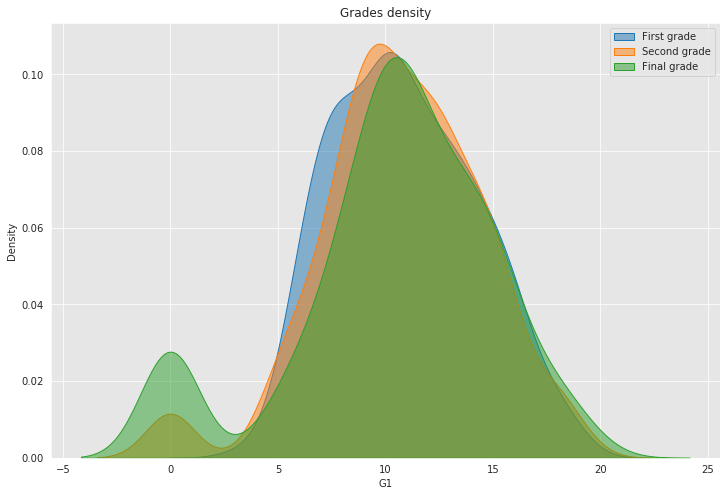

In [8]:
plt.figure(figsize=(12, 8))

#density distribution for the 3 grades (estimated with the kernel method)
s = sns.kdeplot(x="G1", data=data, fill = True, alpha =.5)
sns.kdeplot(x="G2", data=data, fill = True, alpha =.5)
sns.kdeplot(x="G3", data=data, fill = True, alpha =.5)
s.set_title("Grades density")
s.legend(["First grade", "Second grade", "Final grade"])

Everything seems normal except the number of student having 0 a the final exam (null values maybe replaced b 0 or big number of abscences at the final exam). And the distribution of the 3 grades is nearly the same.

### **Gender**

In [9]:
#Gender statistics in the data (count and pourcentage)

gender_stats = pd.concat([data.sex.value_counts(),
                          data.sex.value_counts()/data.shape[0]], axis = 1)
gender_stats.columns = ["count", "pourcentage"]
gender_stats

,count,pourcentage
F,208,0.526582
M,187,0.473418


The two genders are represented with same way in the dataset.

Text(0.5, 1.0, 'Final Grades distribution')

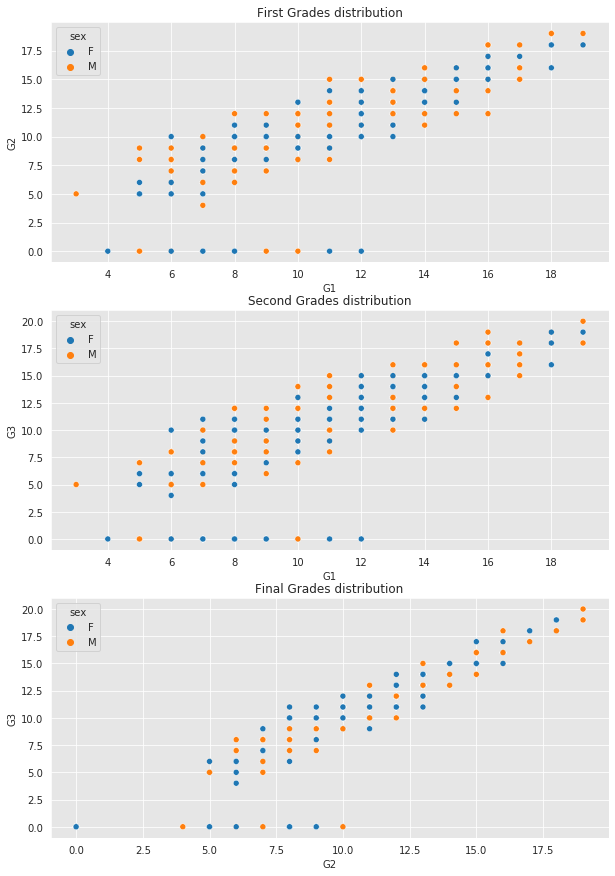

In [10]:
#Plot shape
plt.figure(figsize=(10, 15))

# G2 variation in function of sex and G1
ax_1 = plt.subplot(3, 1, 1)
s = sns.scatterplot(x="G1", y="G2", hue="sex", data=data, ax=ax_1)
s.set_title("First Grades distribution")

# G3 variation in function of sex and G1
ax_2 = plt.subplot(3, 1, 2)
s = sns.scatterplot(x="G1", y="G3", hue="sex", data=data, ax=ax_2)
s.set_title("Second Grades distribution")

# G3 variation in function of sex and G2
ax_3 = plt.subplot(3, 1, 3)
s = sns.scatterplot(x="G2", y="G3", hue="sex", data=data, ax=ax_3)
s.set_title("Final Grades distribution")

The gender has not an impact on having good grades or not. And the values of G1, G2, G3 are very correlated, which is very normal because a good student will have good mark in the 3 exams.

### **Age**

Text(0.5, 1.0, 'Distribution of age of students')

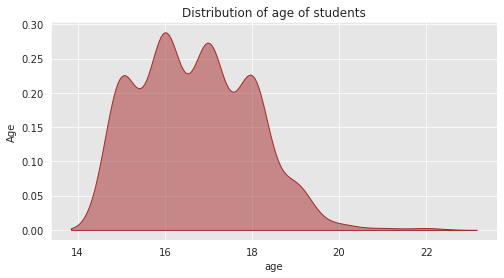

In [11]:
#Plot size
plt.figure(figsize=(8,4))

#Density of age variable
age = sns.kdeplot(x="age", data = data, fill=True, alpha=.5, color = "brown")
age.set_ylabel("Age")
age.set_title("Distribution of age of students")

Text(0.5, 1.0, 'Age and sex of students count')

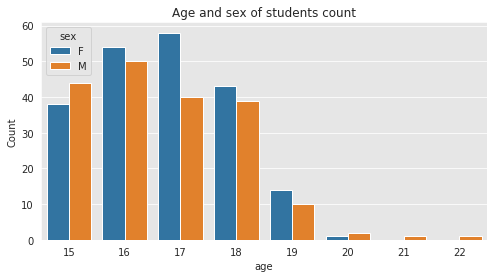

In [12]:
plt.figure(figsize=(8,4))

#Count of Age as the gender vary
age = sns.countplot(x="age", hue="sex", data = data)
age.set_ylabel("Count")
age.set_title("Age and sex of students count")

Execpt for the age 17 where we have girls more than boys, all age ranges are alike in term of sex distibution.

Text(0.5, 1.0, 'Distribution of grades as age and sex change')

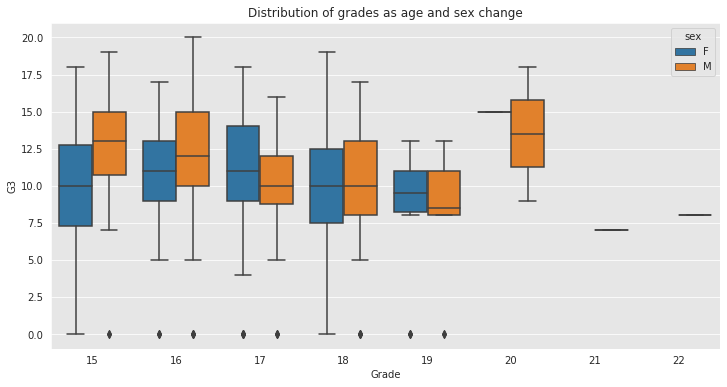

In [13]:
plt.figure(figsize=(12,6))

# Boxplot of the final grade in function of age for every gender
age = sns.boxplot(x="age", y="G3", hue="sex", data = data)
age.set_xlabel("Age")
age.set_xlabel("Grade")
age.set_title("Distribution of grades as age and sex change")

At age of 15 and 16 boys generally perform well at the final exam vs girls, but at 17 girls perform well (maybe because there is big diffence between the number of boys and girls at 17). Otherwise, they behave in the same way.

### **Adress**

"U" for Urban and "R" for Rural.

In [14]:
#Statistics about the adress (Urban or Rural) in the dataset

adress_stats = pd.concat([data.address.value_counts(),
                          data.address.value_counts()/data.shape[0]], axis = 1)
adress_stats.columns = ["count", "pourcentage"]
adress_stats

,count,pourcentage
U,307,0.777215
R,88,0.222785


Text(0.5, 1.0, 'Adress count plot')

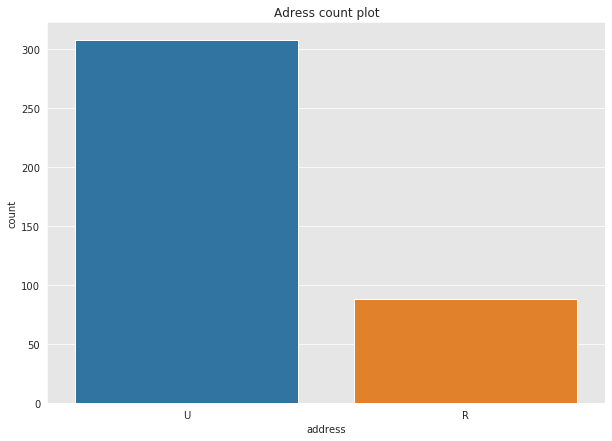

In [15]:
plt.figure(figsize=(10, 7))
s = sns.countplot(x="address", data=data)
s.set_title("Adress count plot")

Most of students are from urban area, let's see if beign in a rural are has an impact on the grades

Text(0.5, 1.0, 'Final Grades distribution')

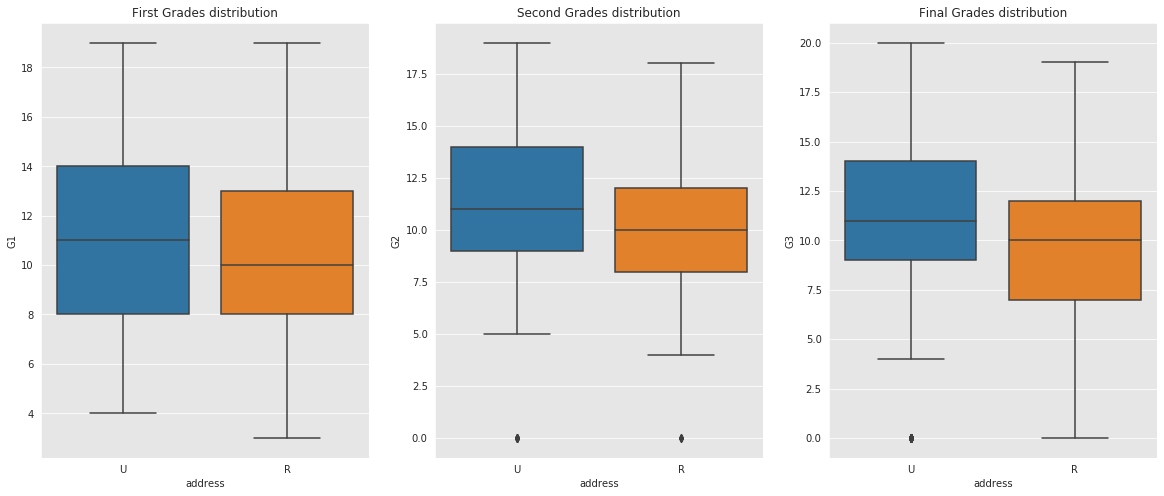

In [16]:
plt.figure(figsize=(20, 8))

# Boxplot of the first grade as the adress vary
ax_1 = plt.subplot(1, 3, 1)
s = sns.boxplot(x="address", y="G1", data=data, ax=ax_1)
s.set_title("First Grades distribution")

# Boxplot of the second grade as the adress vary
ax_2 = plt.subplot(1, 3, 2)
s = sns.boxplot(x="address", y="G2", data=data, ax=ax_2)
s.set_title("Second Grades distribution")

# Boxplot of the final grade as the adress vary
ax_3 = plt.subplot(1, 3, 3)
s = sns.boxplot(x="address", y="G3", data=data, ax=ax_3)
s.set_title("Final Grades distribution")

Sur les trois notes, les élèves des zones urbaines ont des meuilleurs notes généralement. Ainsi, la zone où l'élève habite a un role

### **Parents Education**

In [17]:
#Sum of Father's and mother's Education level
parents_edu = data.Fedu+data.Medu
data["Pedu"] = parents_edu

Text(0.5, 1.0, 'Education of parents count')

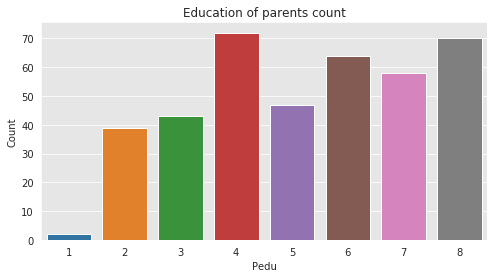

In [18]:
plt.figure(figsize=(8,4))

# Count of values of the parents combined leven=l of study
edu = sns.countplot(x="Pedu", data = data)
edu.set_ylabel("Count")
edu.set_title("Education of parents count")

Text(0.5, 1.0, 'Final Grades distribution')

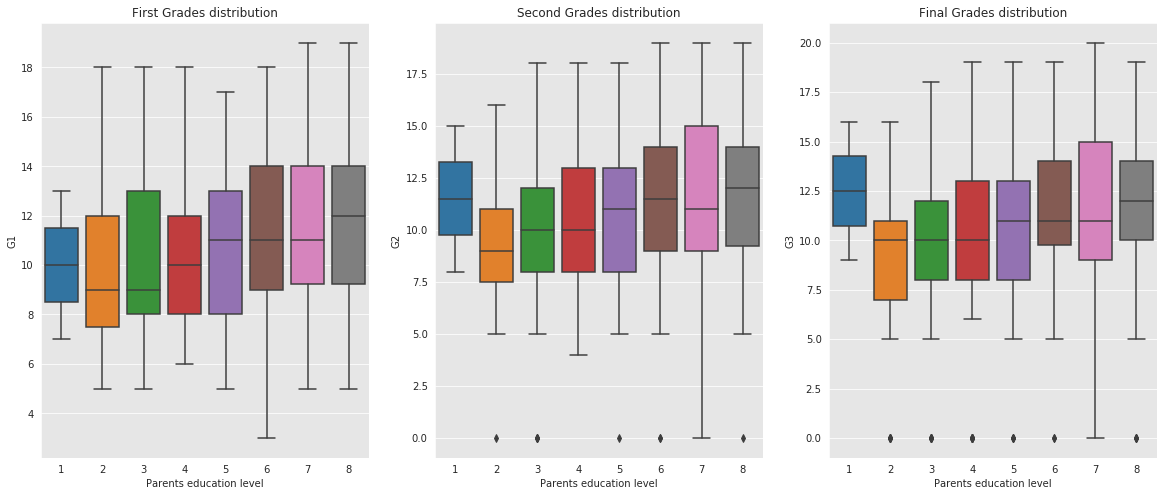

In [19]:
plt.figure(figsize=(20, 8))

# Boxplot of G1 as the parent's education level change
ax_1 = plt.subplot(1, 3, 1)
s = sns.boxplot(x="Pedu", y="G1", data=data, ax=ax_1)
s.set_xlabel("Parents education level")
s.set_title("First Grades distribution")

# Boxplot of G1 as the parent's education level change
ax_2 = plt.subplot(1, 3, 2)
s = sns.boxplot(x="Pedu", y="G2", data=data, ax=ax_2)
s.set_xlabel("Parents education level")
s.set_title("Second Grades distribution")

# Boxplot of G1 as the parent's education level change
ax_3 = plt.subplot(1, 3, 3)
s = sns.boxplot(x="Pedu", y="G3", data=data, ax=ax_3)
s.set_xlabel("Parents education level")
s.set_title("Final Grades distribution")

Generally, more the level of education is higher, the students have better marks generally. Except when the level of education of parents is very low, the students do well in the exams (Maybe they are living in difficult situation and have a big will to have a good life in the future).

### **Study time**

Let's see how the student's work in their homes

In [20]:
print("Label 1: <2 hours.\nLabel 2: 2 to 5 hours.\nLabel 3: 5 to 10 hours.\nLabel 4: >10 hours.")

Label 1: <2 hours.
Label 2: 2 to 5 hours.
Label 3: 5 to 10 hours.
Label 4: >10 hours.


Text(0.5, 1.0, 'Study time at home stats count')

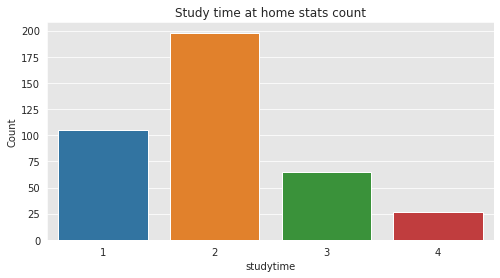

In [21]:
plt.figure(figsize=(8,4))

#Count of how students work at their homes
edu = sns.countplot(x="studytime", data = data)
edu.set_ylabel("Count")
edu.set_title("Study time at home stats count")

In [22]:
#Study time statistics
study_stats = pd.concat([data.studytime.value_counts(),
                          data.studytime.value_counts()/data.shape[0]], axis = 1)
study_stats.columns = ["count", "pourcentage"]
study_stats

,count,pourcentage
2,198,0.501266
1,105,0.265823
3,65,0.164557
4,27,0.068354


We can see that half of students study between 2 to 5 hours, and then 26% study less than 1 hour, while only 7% study more than 10 hours. We except then those 7% to be the ones having the highest grades.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Final grade variation with studytime')

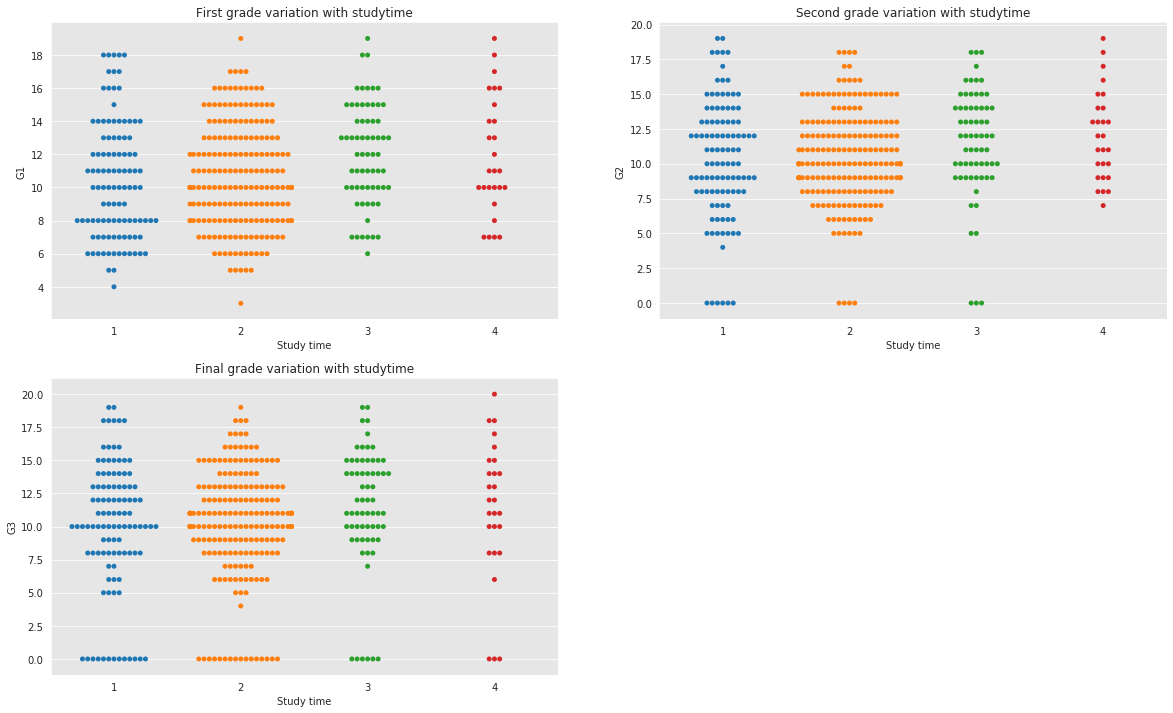

In [23]:
plt.figure(figsize=(20, 12))

# All values of G1 as the parent's education level change
ax_1 = plt.subplot(2, 2, 1)
s = sns.swarmplot(x="studytime", y="G1", data=data, ax=ax_1)
s.set_xlabel("Study time")
s.set_title("First grade variation with studytime")

# All values of G2 as the parent's education level change
ax_2 = plt.subplot(2, 2, 2)
s = sns.swarmplot(x="studytime", y="G2", data=data, ax=ax_2)
s.set_xlabel("Study time")
s.set_title("Second grade variation with studytime")

# All values of G3 (final grade) as the parent's education level change
ax_3 = plt.subplot(2, 2, 3)
s = sns.swarmplot(x="studytime", y="G3", data=data, ax=ax_3)
s.set_xlabel("Study time")
s.set_title("Final grade variation with studytime")

Text(0.5, 1.0, 'First grade variation with studytime')

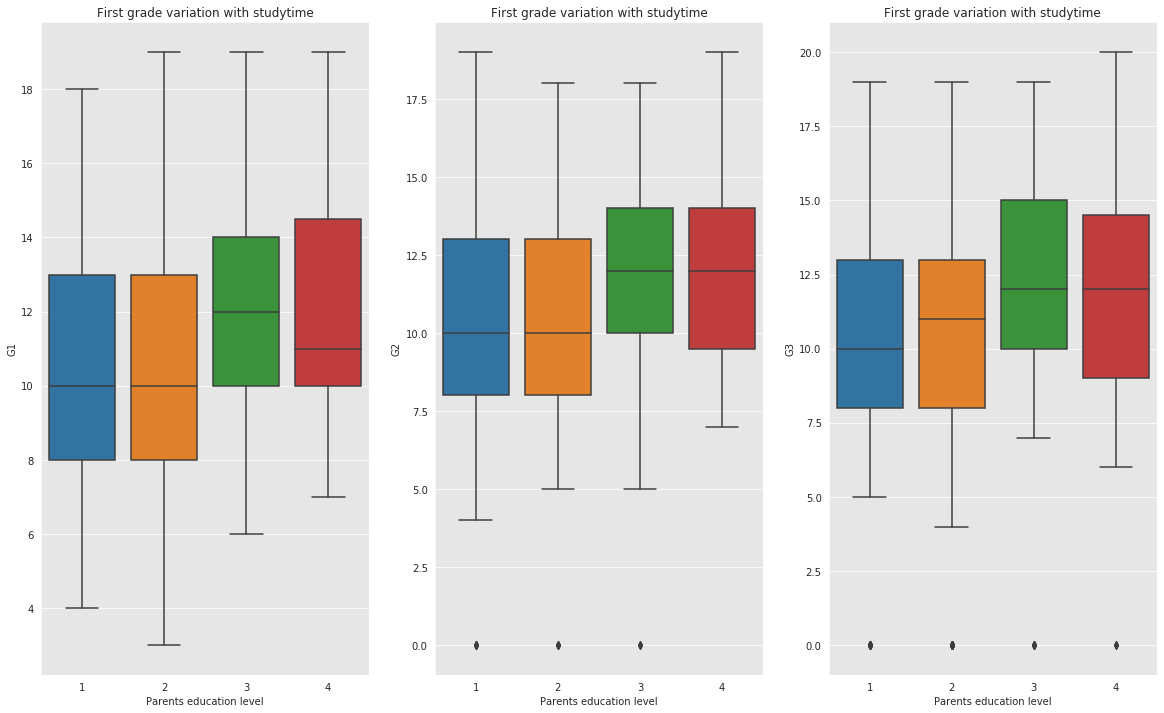

In [24]:
plt.figure(figsize=(20, 12))


ax_1 = plt.subplot(1, 3, 1)
s = sns.boxplot(x="studytime", y="G1", data=data, ax=ax_1)
s.set_xlabel("Parents education level")
s.set_title("First grade variation with studytime")

ax_2 = plt.subplot(1, 3, 2)
s = sns.boxplot(x="studytime", y="G2", data=data, ax=ax_2)
s.set_xlabel("Parents education level")
s.set_title("First grade variation with studytime")

ax_3 = plt.subplot(1, 3, 3)
s = sns.boxplot(x="studytime", y="G3", data=data, ax=ax_3)
s.set_xlabel("Parents education level")
s.set_title("First grade variation with studytime")

As excepted, the studytime has an effect on the variation of the 3 grades. The ones who studied more than 5 hours per week (class 3 and 4) had generally are more luckly to have good marks. Even thoug, some of those who studied less than 1 hour have very good marks (skilled student or cheating maybe). While some with more than 10 hours had 0 (bad method of working or abscence).

### **Absences**

In [25]:
#Absences
data.absences.value_counts().sort_values(ascending=False)

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
1       3
22      3
15      3
13      3
11      3
9       3
21      1
25      1
54      1
26      1
56      1
24      1
28      1
75      1
19      1
23      1
40      1
30      1
38      1
17      1
Name: absences, dtype: int64

Text(0.5, 1.0, 'Absences density')

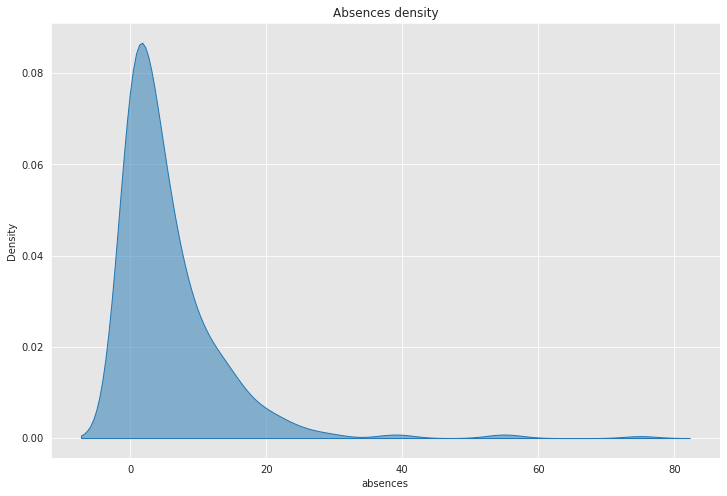

In [26]:
plt.figure(figsize=(12, 8))
#Density of abscences
s = sns.kdeplot(x="absences", data=data, fill = True, alpha =.5)
s.set_title("Absences density")

The density look very close to khi-2 law density.

Text(0.5, 1.0, 'Final grade variation with absences and sex')

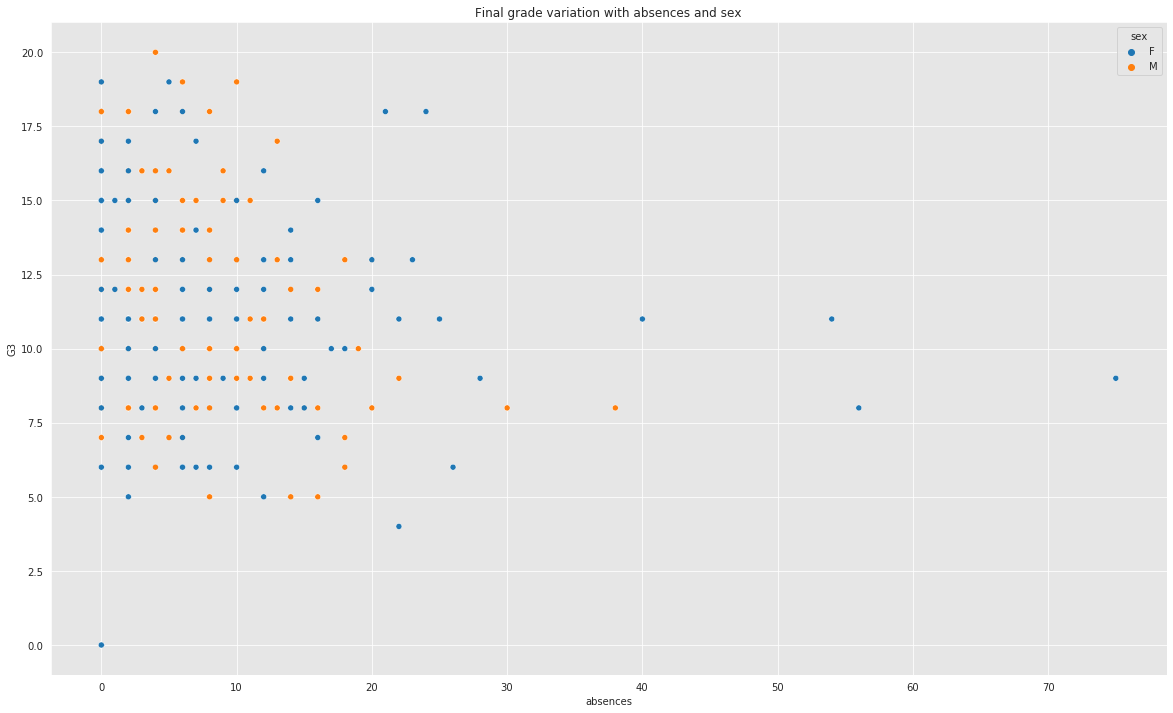

In [27]:
plt.figure(figsize=(20, 12))

s = sns.scatterplot(x="absences", y="G3", data=data, hue="sex", color="darkgreen")
s.set_title("Final grade variation with absences and sex")

### **Romantic Relationship**

In [28]:
#Statistics of romantic status of students
rel_stats = pd.concat([data.romantic.value_counts(),
                          data.romantic.value_counts()/data.shape[0]], axis = 1)
rel_stats.columns = ["count", "pourcentage"]
rel_stats

,count,pourcentage
no,263,0.665823
yes,132,0.334177


Text(0.5, 1.0, 'Grades density for students in relationship or not')

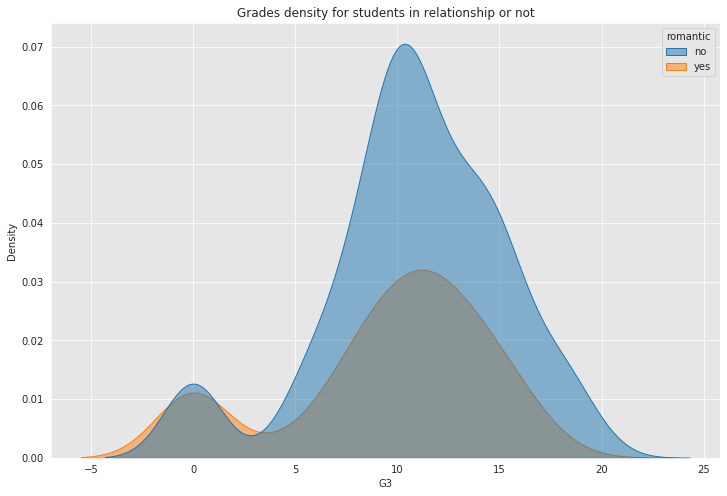

In [29]:
#Density of Grades
plt.figure(figsize=(12, 8))
s = sns.kdeplot(x="G3", data=data, hue = "romantic", fill = True, alpha =.5)
s.set_title("Grades density for students in relationship or not")

We can see clearly that a stuent who is not in relationship is more likely to have good grades.

Text(0.5, 1.0, 'Grades barplot for students in relationship or not')

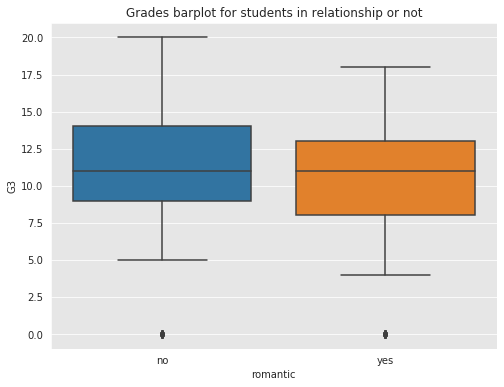

In [30]:
#Density of Grades
plt.figure(figsize=(8, 6))
s = sns.boxplot(x="romantic", y="G3", data=data)
s.set_title("Grades barplot for students in relationship or not")

Same remark.

### **Cleaned dataset**

In [31]:
#Dictionnary to categorical values to numerical values
sex = {"F": 0, "M": 1}
address = {"U": 1, "R": 0}
famsize = {"LE3": 0, "GT3": 1}
Pstatus = {"A": 0, "T": 1}
yes_no = {"no": 0, "yes": 1}
school = {"GP": 0, "MS": 1}

#DataFrame preprocessing
data["sex"] = data["sex"].map(sex)
data["school"] = data["school"].map(school)
data["address"] = data["address"].map(address)
data["famsize"] = data["famsize"].map(famsize)
data["Pstatus"] = data["Pstatus"].map(Pstatus)
data["schoolsup"] = data["schoolsup"].map(yes_no)
data["famsup"] = data["famsup"].map(yes_no)
data["paid"] = data["paid"].map(yes_no)
data["activities"] = data["activities"].map(yes_no)
data["nursery"] = data["nursery"].map(yes_no)
data["higher"] = data["higher"].map(yes_no)
data["internet"] = data["internet"].map(yes_no)
data["romantic"] = data["romantic"].map(yes_no)
data = data.drop(["Medu", "Fedu"], axis = 1)

In [32]:
data.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
famsize      -0.081407
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
famrel        0.051363
nursery       0.051568
studytime     0.097820
internet      0.098483
paid          0.101996
sex           0.103456
address       0.105756
higher        0.182465
Pedu          0.205224
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [33]:
# One hot encoding for categorical data
category_df = data.select_dtypes(include=['object'])
temp_df = pd.get_dummies(category_df)
temp_df['G3'] = data['G3']
temp_df.corr()['G3'].sort_values()

Mjob_at_home        -0.115634
reason_course       -0.098950
Mjob_other          -0.096477
guardian_other      -0.087774
Fjob_other          -0.053483
reason_home         -0.021359
Fjob_services       -0.016108
Fjob_at_home        -0.013385
guardian_mother      0.022338
guardian_father      0.032493
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Mjob_services        0.078429
Fjob_teacher         0.095374
reason_reputation    0.095692
Mjob_health          0.116158
G3                   1.000000
Name: G3, dtype: float64

In [34]:
data = pd.concat([data, temp_df], axis = 1)
G3 = data["G3"].iloc[:, 1]
data = data.drop(["Mjob", "Fjob", "reason", "guardian", "school", "G3"], axis = 1)

In [35]:
data = pd.concat([data, G3], axis = 1)

In [36]:
# Correlation with G3
correlatin_G3 = abs(data.corr()["G3"]).sort_values(ascending=False)

# Least correlated variables
columns_drop = list(correlatin_G3.index)[26:]

In [37]:
data = data.drop(columns_drop, axis = 1)

# **Models**

In [38]:
def MSE(pred, true):
    """
    Function to calculated the Mean Squared Error
    
    inputs:
        pred: predicted values by the model;
        true: true labels
        
    output:
        mse: The mean squared error
    """
    mse = np.mean((pred - true) ** 2)
    return mse

In [39]:
Y_train = data["G3"]
X_train = data.drop(["G3"], axis = 1)

In [40]:
# Creating a traing and test data by splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,
                                                    test_size=0.2, shuffle=True)

In [41]:
def models():
    """
    Function that train many Machine Learning models on the dataset 
    
    
    output:
        results: DataFrame
    """
    
    #Name of models
    models_names = ["Linear Regression", "Random Forest", "kNN", "SVM"]
    results = pd.DataFrame(columns=['MSE'], index = models_names)
    
    #Models from sklearn
    models = [LinearRegression(), RandomForestRegressor(n_estimators=1520),
              KNeighborsRegressor(n_neighbors = 9),
              SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')]
    
    for i, model in tqdm(enumerate(models)):
        #Training a model
        model.fit(X_train, Y_train)
        #Predicting
        pred = model.predict(X_test)
        #Calculating the MSE
        mse = MSE(pred, Y_test)
        #Adding results to the DataFrame
        results.loc[models_names[i], : ] = [mse]
    return results
res = models()

2it [00:02,  1.21s/it]/home/ensimag/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
4it [00:02,  1.64it/s]


In [42]:
res

,MSE
Linear Regression,3.94981
Random Forest,3.720647
kNN,3.736365
SVM,7.501134


RandomForest algorithm gave the best results while SVM is the weakest